In [1]:
import pandas as pd
from src.core.Processing import Processing
from src.core.Analyser import Analyser
from matplotlib import pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
file_path="/home/khaldi/Documents/data_app_machine/whole_data.csv"
sep=","
outcome="Attrition"
positive_mod="Yes"

In [3]:
df=pd.read_csv(file_path,sep=sep)

In [4]:
process=Processing() # object which do processing for df
analyzer=Analyser() #object which give graphics, statistics indicators for df

In [5]:
df.shape

(4410, 29)

In [6]:
process.summary(df)

{'Missing Values': EmployeeID                  0
 JobInvolvement              0
 PerformanceRating           0
 EnvironmentSatisfaction    25
 JobSatisfaction            20
 WorkLifeBalance            38
 Age                         0
 Attrition                   0
 BusinessTravel              0
 Department                  0
 DistanceFromHome            0
 Education                   0
 EducationField              0
 EmployeeCount               0
 Gender                      0
 JobLevel                    0
 JobRole                     0
 MaritalStatus               0
 MonthlyIncome               0
 NumCompaniesWorked         19
 Over18                      0
 PercentSalaryHike           0
 StandardHours               0
 StockOptionLevel            0
 TotalWorkingYears           9
 TrainingTimesLastYear       0
 YearsAtCompany              0
 YearsSinceLastPromotion     0
 YearsWithCurrManager        0
 dtype: int64,
 'Constant Features': ['EmployeeCount', 'Over18', 'StandardHours']}

The dimension of the dataframe is (4410,29).
It can be observed that there are missing values for the features "EnvironmentSatisfaction" (25), "JobSatisfaction" (20), "WorkLifeBalance" (38), and NumCompaniesWorked (19).
3 features are constant.

In [7]:
# processing -- imputation for missings values
df=process.preprocessing(df,method="imputation")

In [8]:
# processing -- remove constant features
df=process.remove_constant_features(df)

In [9]:
df.shape

(4410, 26)

In [10]:
process.summary(df)

{'Missing Values': EmployeeID                 0
 JobInvolvement             0
 PerformanceRating          0
 EnvironmentSatisfaction    0
 JobSatisfaction            0
 WorkLifeBalance            0
 Age                        0
 Attrition                  0
 BusinessTravel             0
 Department                 0
 DistanceFromHome           0
 Education                  0
 EducationField             0
 Gender                     0
 JobLevel                   0
 JobRole                    0
 MaritalStatus              0
 MonthlyIncome              0
 NumCompaniesWorked         0
 PercentSalaryHike          0
 StockOptionLevel           0
 TotalWorkingYears          0
 TrainingTimesLastYear      0
 YearsAtCompany             0
 YearsSinceLastPromotion    0
 YearsWithCurrManager       0
 dtype: int64,
 'Constant Features': []}

No     3699
Yes     711
Name: Attrition, dtype: int64

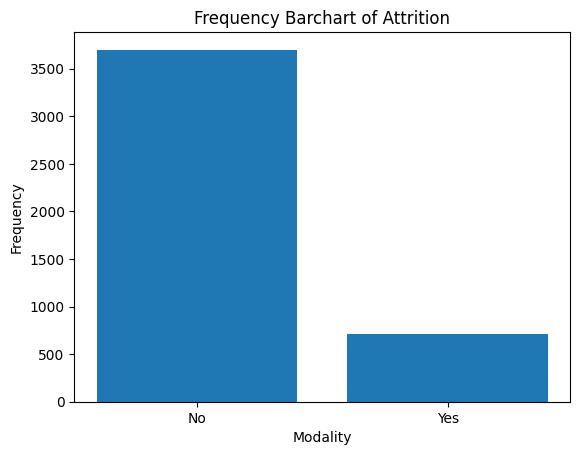

In [11]:
fig,ax=plt.subplots()
analyzer.bar_chart(df,outcome,ax)

We can see above that, Attrition attribute is imbalanced ( 711 rows for "Yes" modality and 3699 for "No" modality)

In [12]:
analyzer_summary=analyzer.summary(df)
quantitatives,qualitatives=analyzer_summary["features"]["quantitative_columns"],analyzer_summary["features"]["qualitative_columns"]

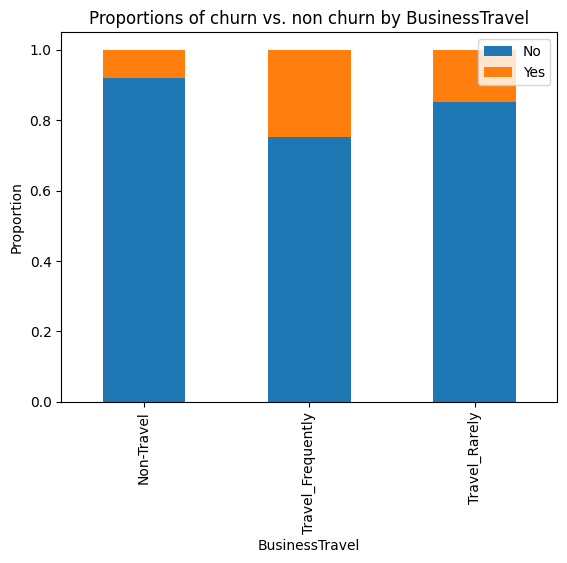

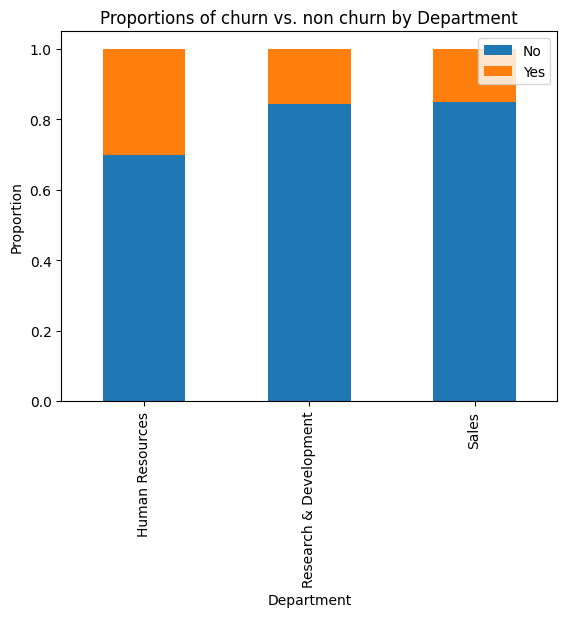

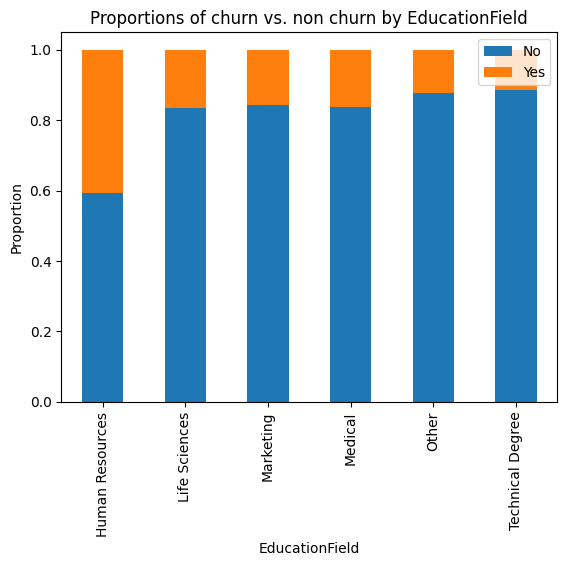

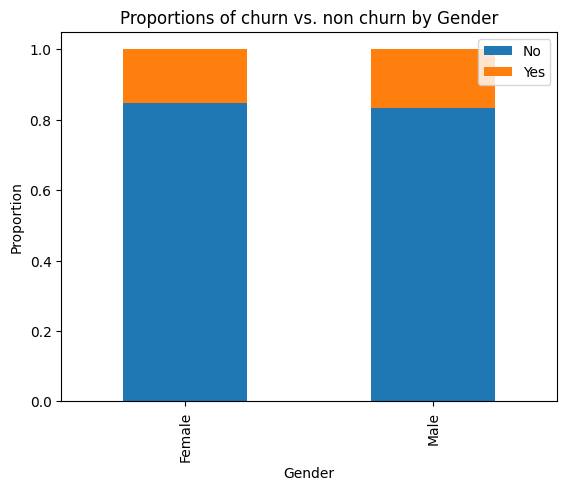

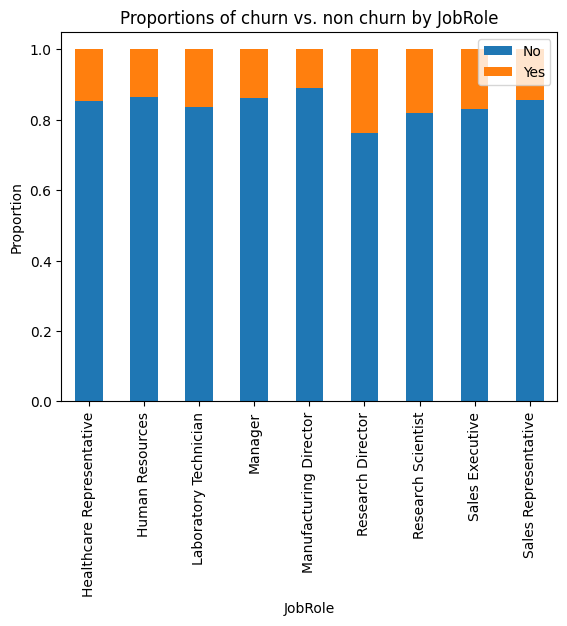

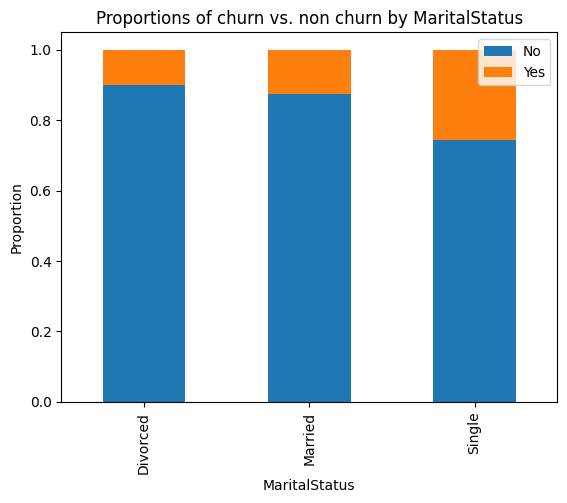

In [13]:
for c in analyzer.summary(df)["features"]["qualitative_columns"]:
    if c != outcome:
        analyzer.prop_churn_by_cats(df,outcome,c)

'BusinessTravel': a good influence, for peoples who don't travel, proportion of Yes Attrition is significantly less than others distributions
'Department': link between 'EducationField' and 'Department',distributon for "Human Ressources" department is not same than distributions for others modalities
'EducationField': influence, distribution for "Human Ressources" modality have more "Yes" for Attrition
'Gender': no influence, distributions are equals
'JobRole': influence because distributions are not same for some modalities
'MaritalStatus: little influence for "Single" attribute but distributions seems balanced rather than imbalanced

Conclusion:
'BusinessTravel', 'Department', 'JobRole' have influence
maybe also a little bit 'MaritalStatus'
(*):'EducationField' have a link with 'Department', we decided to remove it

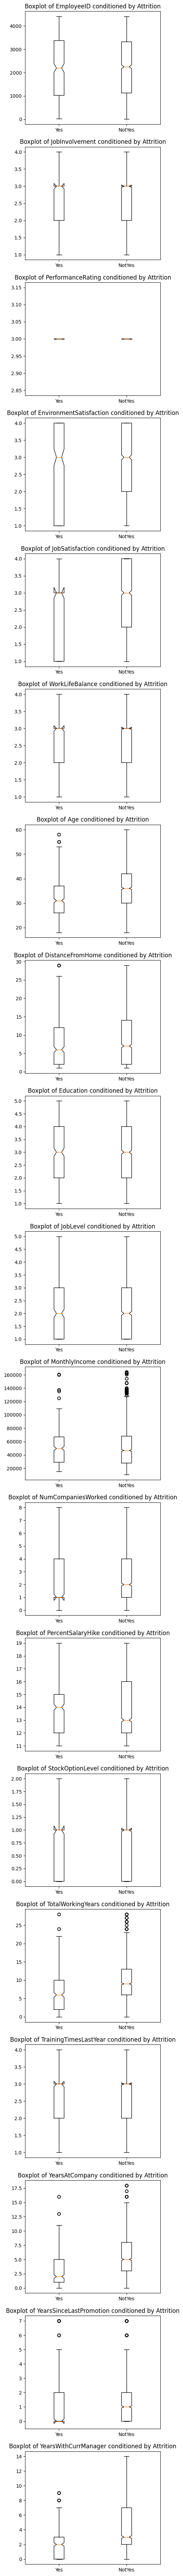

In [14]:
#we decided to remove outliers before boxplots creation
df=process.remove_outliers(df)
fig,axs=plt.subplots(nrows=len(quantitatives),figsize=(5,len(quantitatives)*5))
for i in range(len(quantitatives)):
    analyzer.prop_churn_by_numerical_boxplot(df,outcome,positive_mod,quantitatives[i],axs[i])

'EmployeeID': synthetic feature, not interesting
'JobInvolvement': no influence, identical distributions
'PerformanceRating': no influence, identical distributions
'EnvironmentSatisfaction': influence, "No" modality for attrition seem increase 'EnvironmentSatisfaction', it's seem logic
'JobSatisfaction': influence, quantile 75% are differents but identical medians
'WorkLifeBalance': no influence, identical distributions
'Age': influence, different median for distributions
'DistanceFromHome': a little bit influence, interquartile range differents for distributions
'Education': no influence, identical distributions
'JobLevel': no influence, identical distributions
'MonthlyIncome': a little bit influence, interquartile range differents for distributions
'NumCompaniesWorked': influence, different median for distributions
'PercentSalaryHike': influence, different median for distributions
'StockOptionLevel': no influence, identical distributions
'TotalWorkingYears': influence, different distributions
'TrainingTimesLastYear': no influence, identical distributions
'YearsAtCompany': influence, different median for distributions
'YearsSinceLastPromotion': influence, different median for distributions
'YearsWithCurrManager': influence, different distributions

Conclusion -relevant quantitative features:
YearsWithCurrManager, YearsSinceLastPromotion, YearsAtCompany, TotalWorkingYears, PercentSalaryHike, NumCompaniesWorked, Age, JobSatisfaction, EnvironmentSatisfaction

In [15]:
relevant_features_quanti=[
    "YearsWithCurrManager",
    "YearsSinceLastPromotion",
    "YearsAtCompany",
    "TotalWorkingYears",
    "PercentSalaryHike",
    "NumCompaniesWorked",
    "Age",
    "JobSatisfaction",
    "EnvironmentSatisfaction"
]
relevant_features_quali=[
    'BusinessTravel',
    'Department',
    'JobRole'
]
relevant_features=relevant_features_quanti+relevant_features_quali
df_new=df[[outcome]+relevant_features] #we decided to work with only relevant features for Attrition

<Axes: >

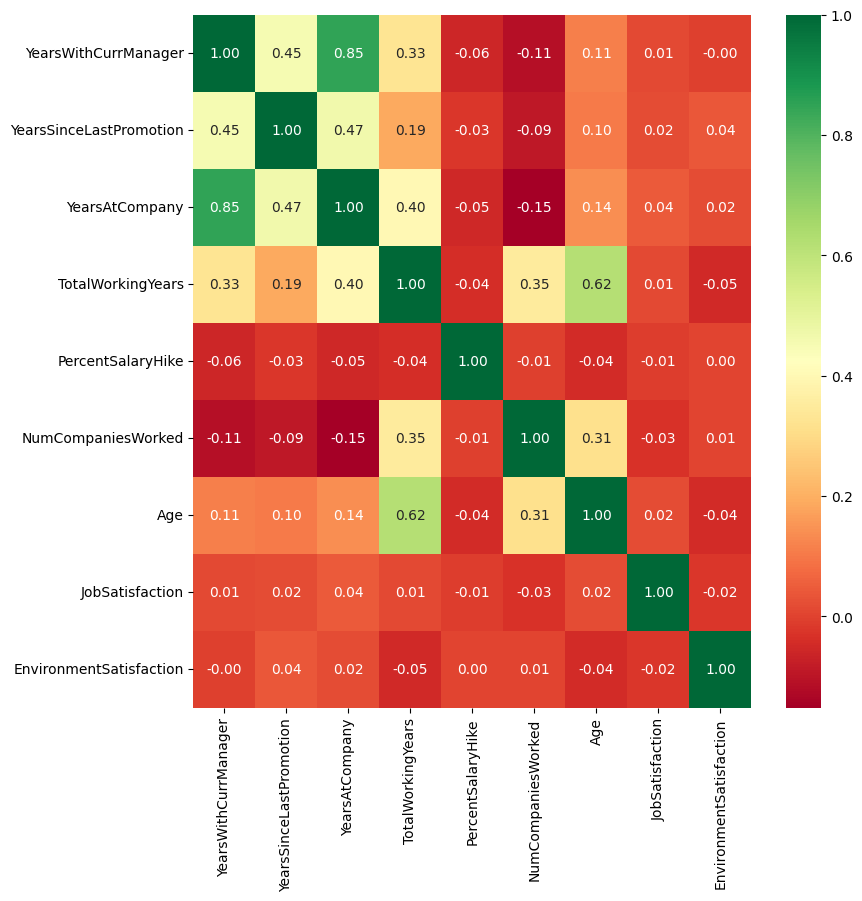

In [16]:
plt.figure(figsize=(9,9))
analyzer.correlation_heatmap(df_new,annot=True)

In [17]:
correlations=df_new.corr(numeric_only=True)
groups={1:.3,2:.5,3:.5}
"""
high correlation (>=.5): group3
medium correlation (>=.3 and <.5): group2
low correlation (<.3):group1
"""
print()

In [18]:
dict_correlations={key:[] for key in groups.keys()}
for group in groups.keys():
    if group==1:
        rows, cols =np.where(np.abs(correlations) < groups[group])
    elif group==2:
        rows, cols =np.where((np.abs(correlations) < groups[group]) & (np.abs(correlations) >= groups[group-1]))
    elif group==3:
        rows, cols =np.where(np.abs(correlations) >= groups[group])
    dict_correlations[group]=[(correlations.index[row], correlations.columns[col], correlations.iloc[row, col]) \
                              for row, col in zip(rows, cols) if row != col]

In [19]:
{
    group_number: dict_correlations[group_number]
        for group_number in dict_correlations.keys()
}

{1: [('YearsWithCurrManager', 'PercentSalaryHike', -0.06101804877091935),
  ('YearsWithCurrManager', 'NumCompaniesWorked', -0.1144413079896632),
  ('YearsWithCurrManager', 'Age', 0.11139218100480652),
  ('YearsWithCurrManager', 'JobSatisfaction', 0.010893529792817333),
  ('YearsWithCurrManager', 'EnvironmentSatisfaction', -0.0038644976628041876),
  ('YearsSinceLastPromotion', 'TotalWorkingYears', 0.18953699776224991),
  ('YearsSinceLastPromotion', 'PercentSalaryHike', -0.025011308181781766),
  ('YearsSinceLastPromotion', 'NumCompaniesWorked', -0.09062920715817095),
  ('YearsSinceLastPromotion', 'Age', 0.10103217188348437),
  ('YearsSinceLastPromotion', 'JobSatisfaction', 0.01773177558473827),
  ('YearsSinceLastPromotion', 'EnvironmentSatisfaction', 0.03931198344894711),
  ('YearsAtCompany', 'PercentSalaryHike', -0.05346401355489929),
  ('YearsAtCompany', 'NumCompaniesWorked', -0.15142031085015006),
  ('YearsAtCompany', 'Age', 0.13817718119186792),
  ('YearsAtCompany', 'JobSatisfaction'

We can see that 'YearsWithCurrManager' and 'YearsAtCompany' have high correlations
'Age' and 'TotalWorkingYears' also with .62 (absolute value).
We remove 'YearsWithCurrManager' and 'Age'

In [20]:
removed_features=["YearsWithCurrManager","Age"]
relevant_features=[f for f in relevant_features if f not in removed_features]
df_new_=df_new[[outcome]+relevant_features]

In [21]:
process.summary(df_new_)

{'Missing Values': Attrition                  0
 YearsSinceLastPromotion    0
 YearsAtCompany             0
 TotalWorkingYears          0
 PercentSalaryHike          0
 NumCompaniesWorked         0
 JobSatisfaction            0
 EnvironmentSatisfaction    0
 BusinessTravel             0
 Department                 0
 JobRole                    0
 dtype: int64,
 'Constant Features': []}

In [22]:
analyzer.summary(df_new_)

{'features': {'qualitative_columns': ['Attrition',
   'BusinessTravel',
   'Department',
   'JobRole'],
  'quantitative_columns': ['YearsSinceLastPromotion',
   'YearsAtCompany',
   'TotalWorkingYears',
   'PercentSalaryHike',
   'NumCompaniesWorked',
   'JobSatisfaction',
   'EnvironmentSatisfaction']},
 'describe':        YearsSinceLastPromotion  YearsAtCompany  TotalWorkingYears  \
 count              2286.000000     2286.000000         2286.00000   
 mean                  1.422572        5.383202            9.53755   
 std                   1.948550        3.790944            5.97753   
 min                   0.000000        0.000000            0.00000   
 25%                   0.000000        2.000000            6.00000   
 50%                   1.000000        5.000000            9.00000   
 75%                   2.000000        8.000000           12.00000   
 max                   7.000000       18.000000           28.00000   
 
        PercentSalaryHike  NumCompaniesWorked  Job

In [23]:
###END OF SESSION 1

In [24]:
from src.core.ComputeModel import ComputeModel
from src.core.globals import MODEL_HYPERPARAMETERS_DEF
import copy

positive_mod="Yes"
models={"Logistic Regression":None,
        "SVM":None,
        "DecisionTreeClassifier":None
        }

In [25]:
#we use liblinear solver because Gradient descent doesn't converge for Logistic Regression
for model_name in models.keys():
    if model_name == "Logistic Regression":
        hyperparameters=copy.deepcopy(MODEL_HYPERPARAMETERS_DEF[model_name])
        hyperparameters["solver"]="liblinear"
    else:
        hyperparameters=None
    models[model_name]=ComputeModel(df_new_[relevant_features],df_new_[outcome], \
                                    process=process,model_name=model_name,\
                                    hyperparameters=hyperparameters,positive_mod=positive_mod)
    models[model_name].fit()

/home/khaldi/.cache/pypoetry/virtualenvs/app-machine-ZfQQWeXB-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


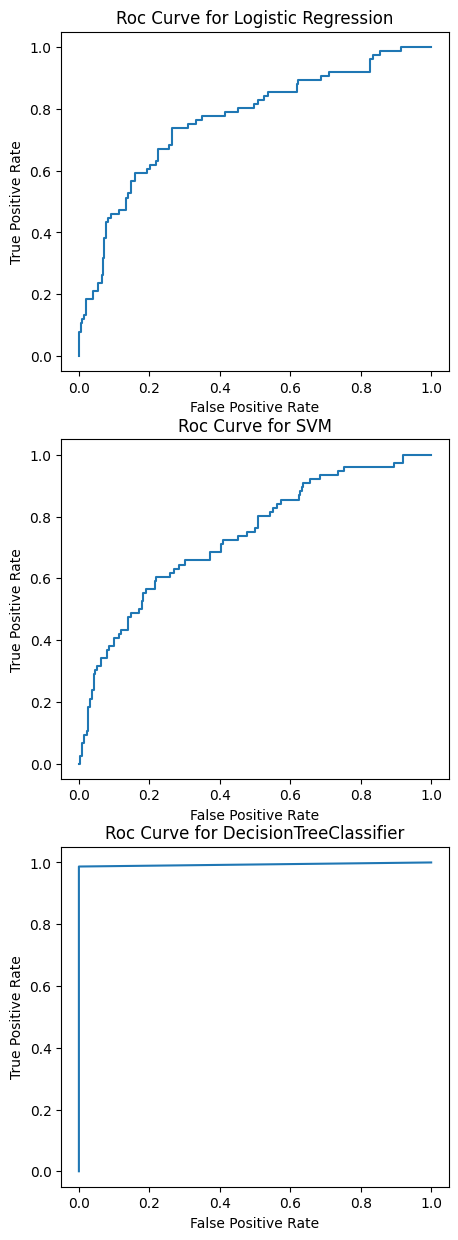

In [26]:
fig,axs=plt.subplots(nrows=len(models.keys()),figsize=(5,5*len(models.keys())))
metrics_default={list(models.keys())[i]:models[list(models.keys())[i]].metrics(plot_roc=True,ax=axs[i]) for i in range(len(models.keys()))}

In [27]:
metrics_default

{'Logistic Regression': {'auc': 0.7653279140259024,
  'accuracy': 0.8427947598253275,
  'precision': 0.625,
  'recall': 0.13157894736842105,
  'f1_score': 0.21739130434782608},
 'SVM': {'auc': 0.7357743179939378,
  'accuracy': 0.834061135371179,
  'precision': 0.0,
  'recall': 0.0,
  'f1_score': 0.0},
 'DecisionTreeClassifier': {'auc': 0.993421052631579,
  'accuracy': 0.9978165938864629,
  'precision': 1.0,
  'recall': 0.9868421052631579,
  'f1_score': 0.9933774834437086}}

In conclusion:
we set up three models, DecisionTreeClassifier, SVM, Logistic Regression:
we use AUC metrics because it's metrics that allow to see False positive Rate and True Positive Rate, and as dataset is imbalanced, accuracy in this case is not relevant
- We can see that  DecisionTreeClassifier is the best model because AUC of this model (~0.99) is significantly bigger than auc for 2 others models
- I think that DecisionTreeClassifier handle imbalanced dataset whereas Logistic Regression and SVM doesn't handle this kind of dataset:
    - Logistic Regression have lower recall (~0.1315) implies that they are a important proportion of false negative people, it's logic because dataset is imbalanced
      Logistic Regression don't handle imbalanced data, so if this model have as input, a lot of negative, predictions will tend to always be negative implies
      that false negatives people's increase
    - we can see SVM precision and recall are equal to 0, so model don't predict True positive for Attrition because dataset is imbalanced, and
      we can see SVM is more sensible for imbalanced dataset
- Simplify conclusion: DecisionTreeClassifier > Logistic Regression > SVM (with default hyperparameters)



In [28]:
params_grid= \
    {
        "Logistic Regression": \
            {
                "penalty": ["l1", "l2"],
                "C": np.logspace(-3, 3, 7),
                "solver": ["liblinear"],
                "multi_class": ["auto"],
                "n_jobs": [None],
                "max_iter": [100,150]
            },
        "SVM":
            {
                "kernel": ["poly", "rbf", "sigmoid"],
                "C": [0.1, 1, 10, 100],
                "degree": [3],
                "gamma": [1, 0.1, 0.01, 0.001]

            },
        "DecisionTreeClassifier":
            {
                "criterion": ["gini"],
                "splitter": ["best"],
                "max_depth": [None],
                "min_samples_split": [2, 3, 4],
                "min_samples_leaf": [1],
                "min_weight_fraction_leaf": [0.],
                "max_features": [None],
                "random_state": [None],
                "max_leaf_nodes": [None]+list(range(2, 100)),
                "min_impurity_decrease": [0.],
                "class_weight": [None],
                "ccp_alpha": [0.]
            }

    }


In [29]:
#we used 3 fold cross validation with a params default grid located in globals file (in src directory)
for model_name in models.keys():
    models[model_name]=ComputeModel(df_new_[relevant_features],df_new_[outcome], \
                                    process=process,model_name=model_name,\
                                    positive_mod=positive_mod,grid_search=True,cv=3,params_grid=params_grid[model_name])
    models[model_name].fit()

Fitting 3 folds for each of 28 candidates, totalling 84 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 297 candidates, totalling 891 fits


{'Logistic Regression': {'auc': 0.7677390465693028,
  'accuracy': 0.8427947598253275,
  'precision': 0.6111111111111112,
  'recall': 0.14473684210526316,
  'f1_score': 0.2340425531914894},
 'SVM': {'auc': 0.9998622209975201,
  'accuracy': 0.9978165938864629,
  'precision': 1.0,
  'recall': 0.9868421052631579,
  'f1_score': 0.9933774834437086},
 'DecisionTreeClassifier': {'auc': 0.9921121521080187,
  'accuracy': 0.9956331877729258,
  'precision': 0.9868421052631579,
  'recall': 0.9868421052631579,
  'f1_score': 0.9868421052631579}}

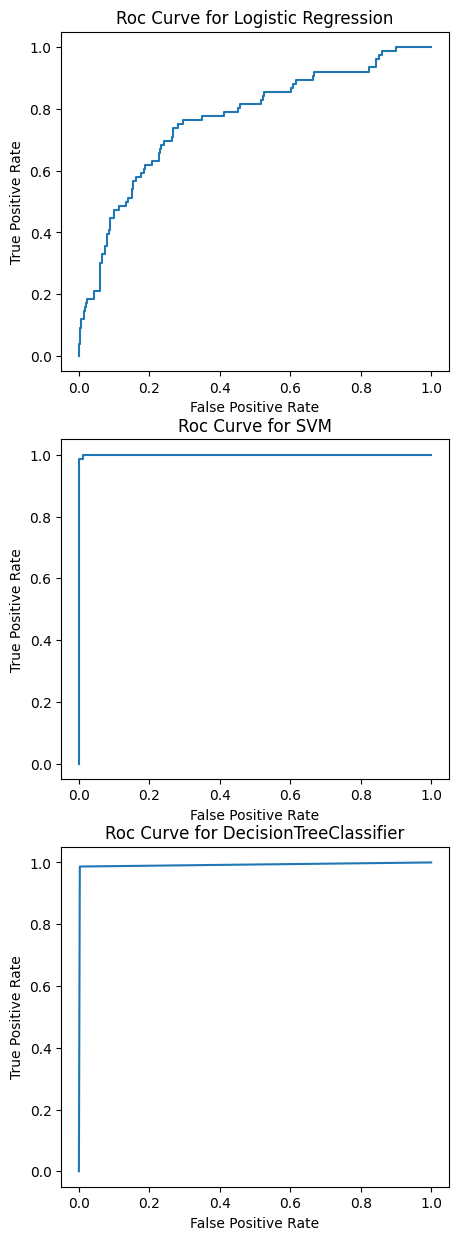

In [30]:
fig,axs=plt.subplots(nrows=len(models.keys()),figsize=(5,5*len(models.keys())))
metrics={list(models.keys())[i]:models[list(models.keys())[i]].metrics(plot_roc=True,ax=axs[i]) for i in range(len(models.keys()))}
metrics

In [31]:
resume_tuned=pd.DataFrame(metrics)
resume_default=pd.DataFrame(metrics_default)

In [32]:
pd.concat([resume_tuned.T,resume_default.T])\
    .reset_index()\
    .groupby("index")\
    .agg(lambda x:[a for a in x])
#first component of tuple is indicator for hyperparameters tuning

,auc,accuracy,precision,recall,f1_score
index,,,,,
DecisionTreeClassifier,"[0.9921121521080187, 0.993421052631579]","[0.9956331877729258, 0.9978165938864629]","[0.9868421052631579, 1.0]","[0.9868421052631579, 0.9868421052631579]","[0.9868421052631579, 0.9933774834437086]"
Logistic Regression,"[0.7677390465693028, 0.7653279140259024]","[0.8427947598253275, 0.8427947598253275]","[0.6111111111111112, 0.625]","[0.14473684210526316, 0.13157894736842105]","[0.2340425531914894, 0.21739130434782608]"
SVM,"[0.9998622209975201, 0.7357743179939378]","[0.9978165938864629, 0.834061135371179]","[1.0, 0.0]","[0.9868421052631579, 0.0]","[0.9933774834437086, 0.0]"


- We can see that SVM are significantly improve in term of performance (auc: 0.73 to .99)!, DecisionTreeClassifier stay at the same order of values.
  But with tuning, LogisticRegression, auc stay constant, but precision stay constant, f1_score and recall increase a little bit after tuning
- An important things: metrics after tuning are more reliable because a 3 fold cross validation are set up during training whereas with default hyperparameters this 3 cross validation was not done (1 test set and 1 training set), that's why some indicators don't increase after tuning.
- Conclusion: SVM/DecisionTreeClassifier now is better than other models with a very high value for all metrics with cross validation (3 fold cross validation)

In [33]:
hyperparameters_tuned={list(models.keys())[i]:models[list(models.keys())[i]].model.hyperparameters for i in range(len(models.keys()))}

In [34]:
best_model,hyperparameters=models["DecisionTreeClassifier"],hyperparameters_tuned["DecisionTreeClassifier"]

In [35]:
###END OF SESSION 2

In [58]:
#increase number of cross validation
model_gradient=ComputeModel(df_new_[relevant_features],df_new_[outcome], \
                          process=process,model_name="GradientBoostingClassifier", \
                          positive_mod=positive_mod,grid_search=True,cv=11)
model_gradient.fit()

Fitting 11 folds for each of 48 candidates, totalling 528 fits


In [59]:
model_gradient.metrics()

{'auc': 0.9986222099751998,
 'accuracy': 0.9978165938864629,
 'precision': 1.0,
 'recall': 0.9868421052631579,
 'f1_score': 0.9933774834437086}

In [36]:
#increase number of cross validation
model_random=ComputeModel(df_new_[relevant_features],df_new_[outcome], \
                          process=process,model_name="RandomForestClassifier", \
                          positive_mod=positive_mod,grid_search=True,cv=11)
model_random.fit()

Fitting 11 folds for each of 25 candidates, totalling 275 fits


In [37]:
model_random.metrics()

{'auc': 0.9998277762468999,
 'accuracy': 0.9978165938864629,
 'precision': 1.0,
 'recall': 0.9868421052631579,
 'f1_score': 0.9933774834437086}

We can see that metrics of GradientBoosting and RandomForest are equivalent, bias and variance are very low because we have a metrics with cross validation (cv=11) close to .99 . We decide to choose "RandomForestClassifier" for the best model

In [38]:
best_model=model_random.model.model

In [39]:
hyperparameters_best=model_random.model.hyperparameters

In [40]:
hyperparameters_best

{'max_depth': 14, 'n_estimators': 423}

In [41]:
best_model

RandomForestClassifier(max_depth=14, n_estimators=423)

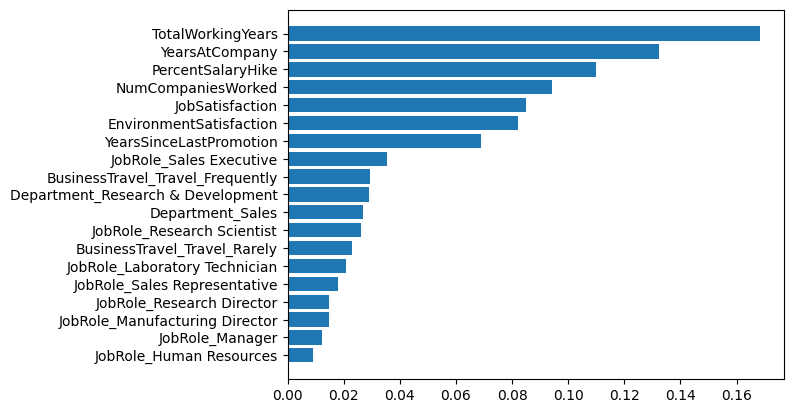

In [42]:
importances=best_model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(model_random.dict_split["columns_features"])[indices])

We can see that "TotalWorkingYears", "YearsAtCompany", "PercentSalaryHike", "NumCompaniesWorked", "JobSatisfaction", "EnvironmentSatisfaction" are top 6
of most influent features for RandomForestClassifier

In [43]:
relevant_features_top6=["TotalWorkingYears","YearsAtCompany","PercentSalaryHike","NumCompaniesWorked","JobSatisfaction","EnvironmentSatisfaction"]
model_top6=ComputeModel(df_new_[relevant_features_top6],df_new_[outcome], \
                        process=process,model_name="RandomForestClassifier", \
                        positive_mod=positive_mod,hyperparameters=hyperparameters_best)

In [44]:
model_top6.fit()

In [45]:
model_top6.metrics()

{'auc': 0.9972271975750895,
 'accuracy': 0.980349344978166,
 'precision': 0.935064935064935,
 'recall': 0.9473684210526315,
 'f1_score': 0.9411764705882352}

In [46]:
relevant_features_bad4=["JobRole","BusinessTravel","YearsSinceLastPromotion","Department"]
model_bad4=ComputeModel(df_new_[relevant_features_bad4],df_new_[outcome], \
                        process=process,model_name="RandomForestClassifier", \
                        positive_mod=positive_mod,hyperparameters=hyperparameters_best)

In [47]:
model_bad4.fit()

In [48]:
model_bad4.metrics()

{'auc': 0.8315651694681732,
 'accuracy': 0.834061135371179,
 'precision': 0.5,
 'recall': 0.17105263157894737,
 'f1_score': 0.25490196078431376}

We can see a coherence, the 6 most influent features for RandomForestClassifier give a good model with high score (auc~ 0.997, accuracy~0.980)
and with the 4 less influent features, model give a metrics that it is smaller than model with 6 most influent features.
Furthermore with model_top6, we simplify the model (decrease number of features) so we kill overfitting with that and metrics are not too high (comparing to
full model with all relevant features,where all metrics are close to .99)

In [49]:
relevant_features_top6=relevant_features_top6
model_seq3=model_top6

In [50]:
hyperparameters_best

{'max_depth': 14, 'n_estimators': 423}

In [51]:
model_seq3

In [52]:
###END OF SESSION 3

In [40]:
models={"Logistic Regression":None,
        "SVM":None,
        "DecisionTreeClassifier":None,
        "RandomForestClassifier": None,
        "GradientBoostingClassifier":None
        }

In [41]:
df_new_[[e for e in relevant_features if e in quantitatives]]=process.standard_scaler(df_new_[[e for e in relevant_features if e in quantitatives]])

/tmp/ipykernel_119511/4022361902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_[[e for e in relevant_features if e in quantitatives]]=process.standard_scaler(df_new_[[e for e in relevant_features if e in quantitatives]])


In [42]:
import copy
#we use liblinear solver because Gradient descent doesn't converge for Logistic Regression
for model_name in models.keys():
    if model_name == "Logistic Regression":
        hyperparameters=copy.deepcopy(MODEL_HYPERPARAMETERS_DEF[model_name])
        hyperparameters["solver"]="liblinear"
    else:
        hyperparameters=None
    models[model_name]=ComputeModel(
        df_new_[relevant_features],df_new_[outcome],
        process=process,model_name=model_name,
        hyperparameters=hyperparameters,positive_mod=positive_mod
    )
    models[model_name].fit()

/home/khaldi/.cache/pypoetry/virtualenvs/app-machine-ZfQQWeXB-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Logistic Regression': {'auc': 0.767980159823643,
  'accuracy': 0.8427947598253275,
  'precision': 0.6111111111111112,
  'recall': 0.14473684210526316,
  'f1_score': 0.2340425531914894},
 'SVM': {'auc': 0.662579222926426,
  'accuracy': 0.834061135371179,
  'precision': 0.0,
  'recall': 0.0,
  'f1_score': 0.0},
 'DecisionTreeClassifier': {'auc': 0.9881854505373382,
  'accuracy': 0.9890829694323144,
  'precision': 0.9493670886075949,
  'recall': 0.9868421052631579,
  'f1_score': 0.967741935483871},
 'RandomForestClassifier': {'auc': 0.9997933314962799,
  'accuracy': 0.9978165938864629,
  'precision': 1.0,
  'recall': 0.9868421052631579,
  'f1_score': 0.9933774834437086},
 'GradientBoostingClassifier': {'auc': 0.9163681454946266,
  'accuracy': 0.8930131004366813,
  'precision': 0.8461538461538461,
  'recall': 0.4342105263157895,
  'f1_score': 0.5739130434782609}}

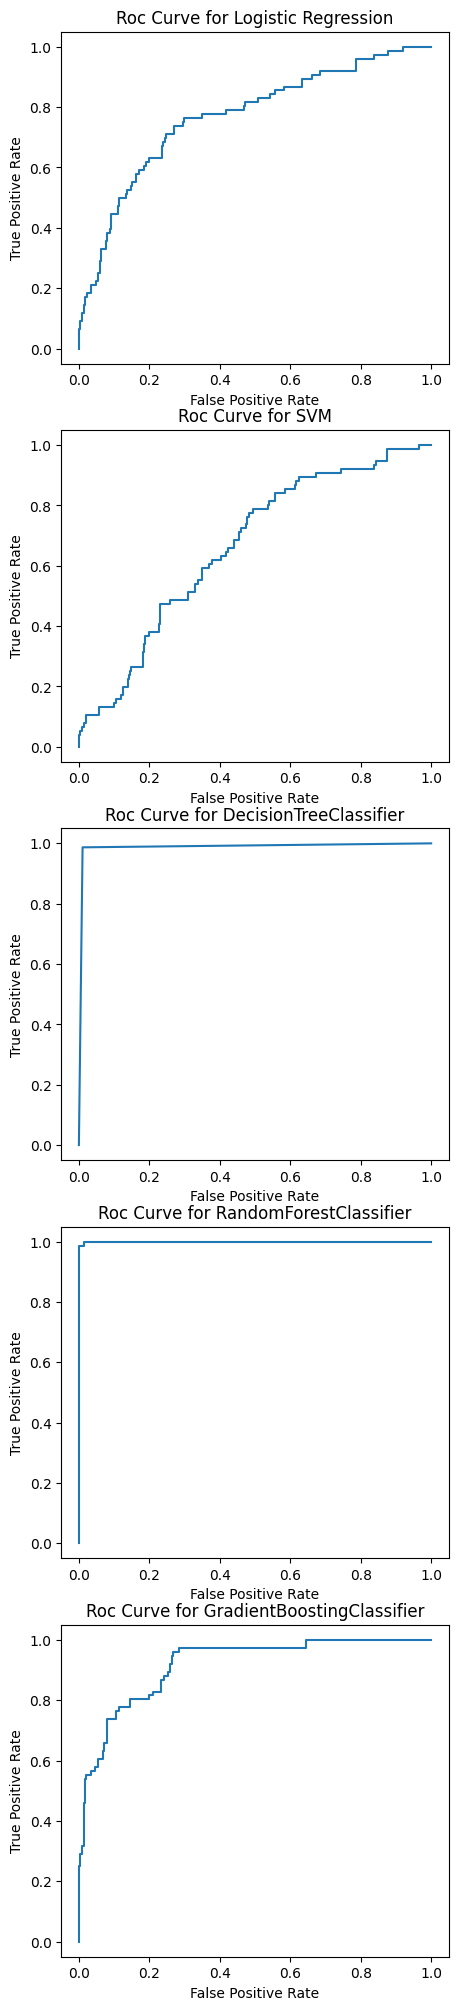

In [43]:
fig,axs=plt.subplots(nrows=len(models.keys()),figsize=(5,5*len(models.keys())))
metrics_default={list(models.keys())[i]:models[list(models.keys())[i]].metrics(plot_roc=True,ax=axs[i]) for i in range(len(models.keys()))}
metrics_default

In [44]:
#we use liblinear solver because Gradient descent doesn't converge for Logistic Regression
for model_name in models.keys():
    if model_name == "Logistic Regression":
        hyperparameters=copy.deepcopy(MODEL_HYPERPARAMETERS_DEF[model_name])
        hyperparameters["solver"]="liblinear"
    else:
        hyperparameters=None
    models[model_name]=ComputeModel(
        df_new_[relevant_features],df_new_[outcome],
        process=process,model_name=model_name,
        hyperparameters=hyperparameters,positive_mod=positive_mod
    )
    models[model_name].fit(sampling=True,method="SMOTE")

{'Logistic Regression': {'auc': 0.7739957702137628,
  'accuracy': 0.7034120734908137,
  'precision': 0.6932668329177057,
  'recall': 0.7296587926509186,
  'f1_score': 0.7109974424552431},
 'SVM': {'auc': 0.7709233196244171,
  'accuracy': 0.7152230971128609,
  'precision': 0.7009803921568627,
  'recall': 0.7506561679790026,
  'f1_score': 0.7249683143219264},
 'DecisionTreeClassifier': {'auc': 0.9881889763779528,
  'accuracy': 0.9881889763779528,
  'precision': 0.9920634920634921,
  'recall': 0.984251968503937,
  'f1_score': 0.9881422924901185},
 'RandomForestClassifier': {'auc': 1.0,
  'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'f1_score': 1.0},
 'GradientBoostingClassifier': {'auc': 0.96332348220252,
  'accuracy': 0.8937007874015748,
  'precision': 0.898936170212766,
  'recall': 0.8871391076115486,
  'f1_score': 0.892998678996037}}

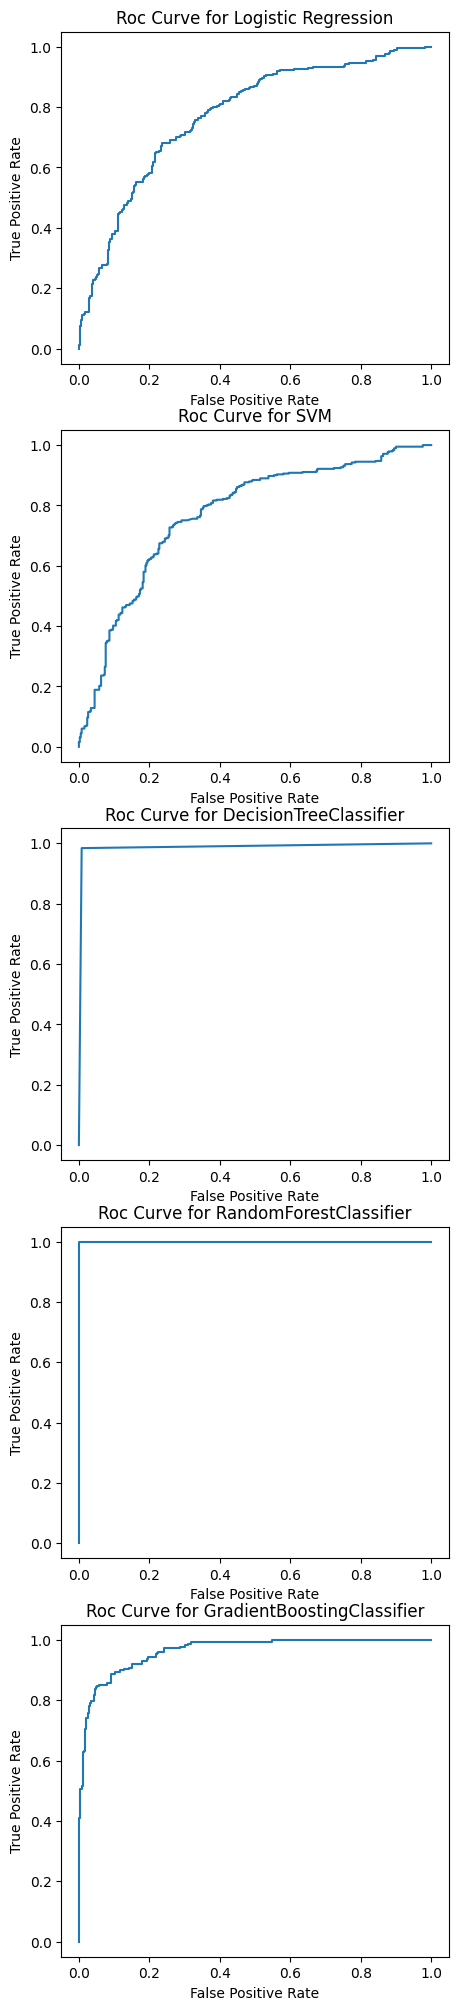

In [45]:
fig,axs=plt.subplots(nrows=len(models.keys()),figsize=(5,5*len(models.keys())))
metrics_default_b={list(models.keys())[i]:models[list(models.keys())[i]].metrics(plot_roc=True,ax=axs[i]) for i in range(len(models.keys()))}
metrics_default_b

We can see with default hyperparameters that SVM and Logistic Regression is not good models for this Dataset. Decision Trees can be better.
We can see with default hyperparameters that with oversampling, metrics of models improve significantly, precisely precision, recall and f1-score increase for Logistic Regression ,SVM, and GradientBoosting.
Means that oversampling works and models don't have a bias for majority class and can predict minority class frequently (that's why precision, recall, f1-score increase).
RandomForest and DecisionTreeClassifier have certain resistance for bias for the majority class because before oversampling, precision, recall and f1-score are already high. I think that for RandomForest, all trees who belong to RandomForest can fight the bias for majority class because the predictions vote is compute with the majority vote of all trees and it's more difficult to have a specific bias (for example majority class bias) with agregation of models (agregation of trees in case of RandomForest).
The best model with default hyperparameter is RandomForestClassifier (1 for auc, 1 for recalll etc..). But the model I think overfit the training set.
We need to do a cross validation using also gridsearch to see if RandomForestClassifier overfit, consequently the variance of this model is high or the variance is small and consequently ( I think it's not the case), it will be the best model for this dataset

In [46]:
#we use liblinear solver because Gradient descent doesn't converge for Logistic Regression
for model_name in models.keys():
    if model_name == "Logistic Regression":
        hyperparameters=copy.deepcopy(MODEL_HYPERPARAMETERS_DEF[model_name])
        hyperparameters["solver"]="liblinear"
    else:
        hyperparameters=None
    models[model_name]=ComputeModel(
        df_new_[relevant_features],df_new_[outcome],
        process=process,model_name=model_name,
        hyperparameters=hyperparameters,positive_mod=positive_mod
    )
    models[model_name].fit(sampling=True,method="RandomUnderSampling")

{'Logistic Regression': {'auc': 0.7635018919848641,
  'accuracy': 0.7336244541484717,
  'precision': 0.6595744680851063,
  'recall': 0.40789473684210525,
  'f1_score': 0.5040650406504065},
 'SVM': {'auc': 0.7615239078087375,
  'accuracy': 0.7205240174672489,
  'precision': 0.6363636363636364,
  'recall': 0.3684210526315789,
  'f1_score': 0.4666666666666667},
 'DecisionTreeClassifier': {'auc': 0.9443154454764363,
  'accuracy': 0.9388646288209607,
  'precision': 0.8690476190476191,
  'recall': 0.9605263157894737,
  'f1_score': 0.9125000000000001},
 'RandomForestClassifier': {'auc': 0.9863261093911249,
  'accuracy': 0.9563318777292577,
  'precision': 0.9230769230769231,
  'recall': 0.9473684210526315,
  'f1_score': 0.935064935064935},
 'GradientBoostingClassifier': {'auc': 0.8507051943584452,
  'accuracy': 0.8034934497816594,
  'precision': 0.7313432835820896,
  'recall': 0.6447368421052632,
  'f1_score': 0.6853146853146853}}

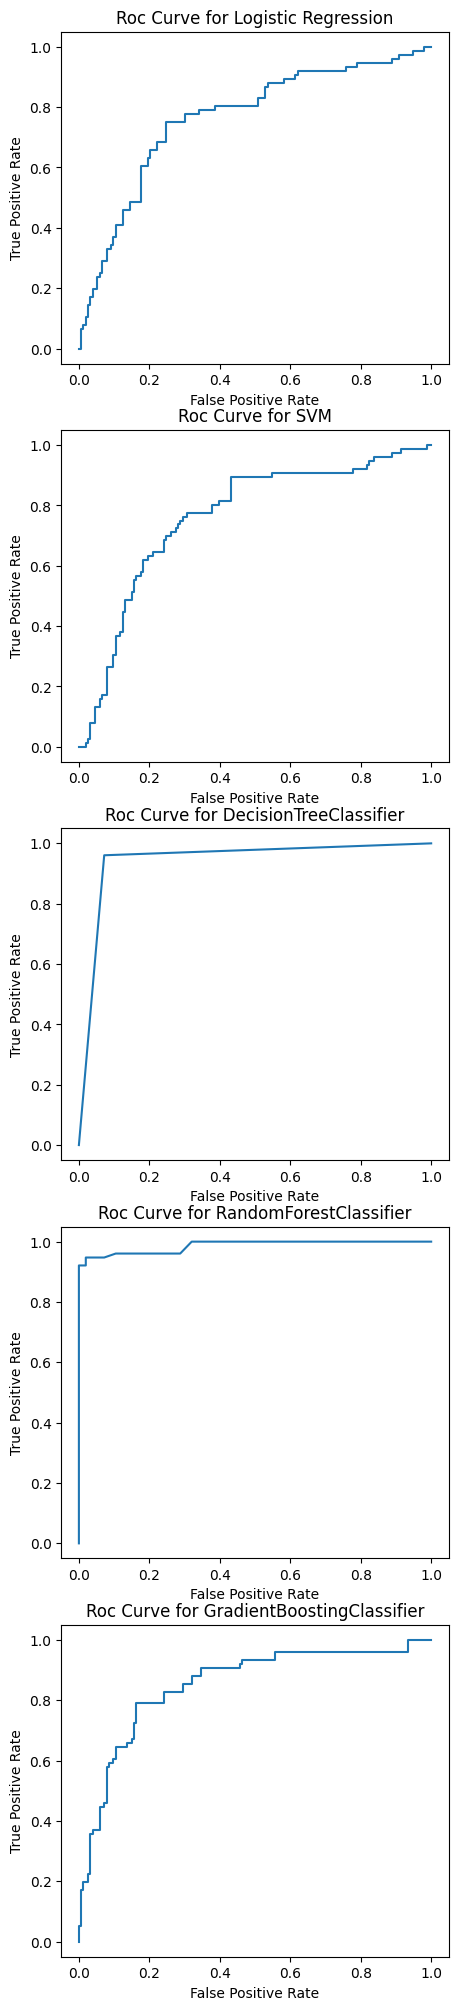

In [47]:
fig,axs=plt.subplots(nrows=len(models.keys()),figsize=(5,5*len(models.keys())))
metrics_default_bunder={list(models.keys())[i]:models[list(models.keys())[i]].metrics(plot_roc=True,ax=axs[i]) for i in range(len(models.keys()))}
metrics_default_bunder

I think for SVM and Logistic Regression with undersampling, the dataset don't have a number of rows necessary to learn how to detect tha majority class or the minority class. That's why metrics are not high. Decision Trees have a better results but metrics are small than for models with oversampling.
RandomForestClassifier seems the best model. It's logical because before we have selected the best model: RandomForestClassifier.
We are going to do a cross validation with grid search to find the best model for this dataset.

In [48]:
params_grid= \
    {
        "Logistic Regression": \
            {
                "penalty": ["l1", "l2"],
                "C": np.logspace(-3, 3, 7),
                "solver": ["liblinear"],
                "multi_class": ["auto"],
                "n_jobs": [None],
                "max_iter": [100,150]
            },
        "SVM":
            {
                "kernel": ["poly", "rbf", "sigmoid"],
                "C": [0.1, 1, 10, 100],
                "degree": [3],
                "gamma": [1, 0.1, 0.01, 0.001]

            },
        "DecisionTreeClassifier":
            {
                "criterion": ["gini"],
                "splitter": ["best"],
                "max_depth": [None],
                "min_samples_split": [2, 3, 4],
                "min_samples_leaf": [1],
                "min_weight_fraction_leaf": [0.],
                "max_features": [None],
                "random_state": [None],
                "max_leaf_nodes": [None]+list(range(2, 100)),
                "min_impurity_decrease": [0.],
                "class_weight": [None],
                "ccp_alpha": [0.]
            },
        "RandomForestClassifier":
            {
                "n_estimators":list(np.random.randint(50,500,size=5)),
                "max_depth":list(np.random.randint(1,20,size=5))
            },
        "GradientBoostingClassifier":
            {
                "learning_rate":[0.15,0.1,0.05,0.01,0.005,0.001],
                "n_estimators":[100,250,500,750,1000,1250,1500,1750]
            }

    }

In [49]:
#we used 3 fold cross validation with a params default grid located in globals file (in src directory)
for model_name in models.keys():
    models[model_name]=ComputeModel(df_new_[relevant_features],df_new_[outcome], \
                                    process=process,model_name=model_name, \
                                    positive_mod=positive_mod,grid_search=True,cv=3,params_grid=params_grid[model_name],stratify=False)
    models[model_name].fit(sampling=True,method="SMOTE")

Fitting 3 folds for each of 28 candidates, totalling 84 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 297 candidates, totalling 891 fits
Fitting 3 folds for each of 25 candidates, totalling 75 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits


{'Logistic Regression': {'auc': 0.794100002068723,
  'accuracy': 0.7493438320209974,
  'precision': 0.7139423076923077,
  'recall': 0.8048780487804879,
  'f1_score': 0.756687898089172},
 'SVM': {'auc': 1.0,
  'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'f1_score': 1.0},
 'DecisionTreeClassifier': {'auc': 0.9907631519063281,
  'accuracy': 0.9908136482939632,
  'precision': 0.9918478260869565,
  'recall': 0.989159891598916,
  'f1_score': 0.9905020352781547},
 'RandomForestClassifier': {'auc': 1.0,
  'accuracy': 1.0,
  'precision': 1.0,
  'recall': 1.0,
  'f1_score': 1.0},
 'GradientBoostingClassifier': {'auc': 0.9999655212837116,
  'accuracy': 0.9986876640419947,
  'precision': 0.9972972972972973,
  'recall': 1.0,
  'f1_score': 0.9986468200270636}}

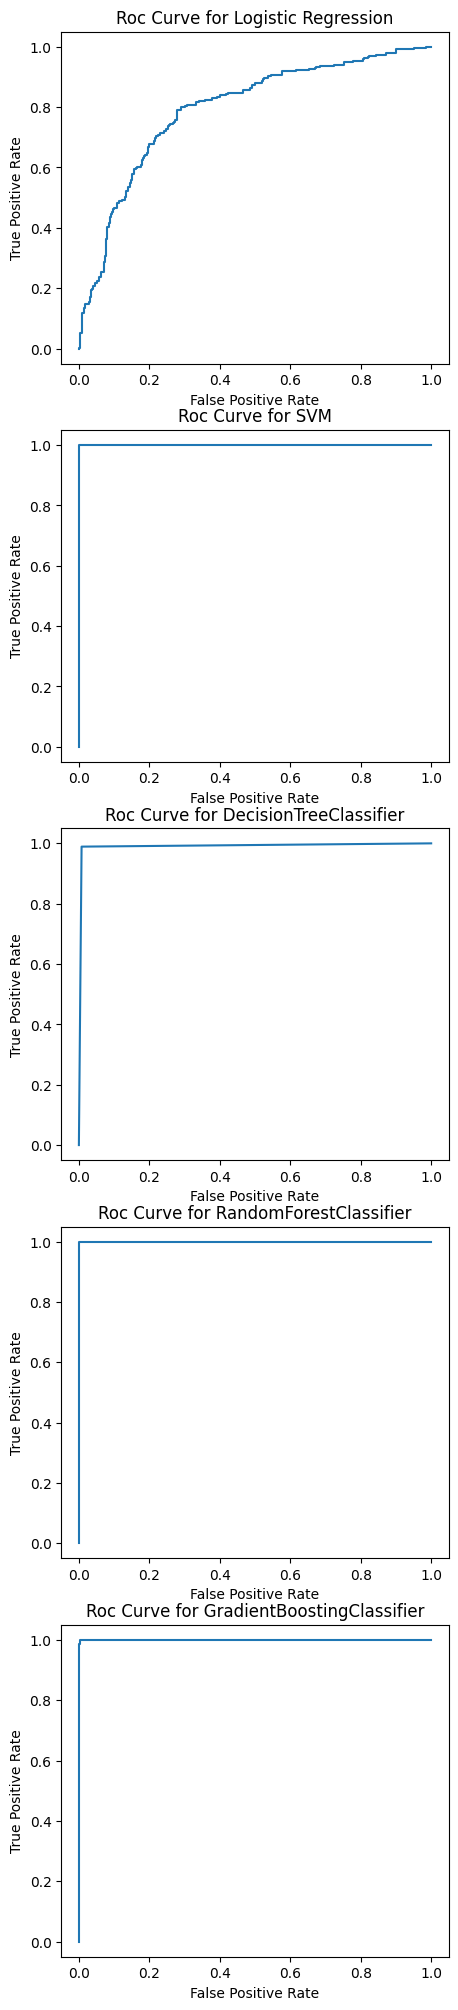

In [50]:
fig,axs=plt.subplots(nrows=len(models.keys()),figsize=(5,5*len(models.keys())))
metrics_b={list(models.keys())[i]:models[list(models.keys())[i]].metrics(plot_roc=True,ax=axs[i]) for i in range(len(models.keys()))}
metrics_b

In [51]:
{key:model.model.hyperparameters for key,model in zip(models.keys(),models.values())}

{'Logistic Regression': {'C': 10.0,
  'max_iter': 100,
  'multi_class': 'auto',
  'n_jobs': None,
  'penalty': 'l2',
  'solver': 'liblinear'},
 'SVM': {'C': 10, 'degree': 3, 'gamma': 1, 'kernel': 'rbf'},
 'DecisionTreeClassifier': {'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': None,
  'max_leaf_nodes': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'random_state': None,
  'splitter': 'best'},
 'RandomForestClassifier': {'max_depth': 19, 'n_estimators': 301},
 'GradientBoostingClassifier': {'learning_rate': 0.1, 'n_estimators': 1250}}

With cross validation (3 fold) and grid search, we have a powerfull models. the metrics for models are high with cross validation ! implies that bias and variance are small, that's very good, we have a certain level of confidence for our predictions.
Logistic Regression for this dataset is not appropriate. SVM with tunig of hyperparameters learnt to detect majority or minority class and have perfect metrics( 1 for all metrics). It's very interesting because we are using a cross validation (3 fold) and with that metrics are equal to 1. So SVM seems overfit training set but with cross validation (3) they are 3 training set and the mean of metrics for the 3 training set is 1 !
So the model recognize perfectly the pattern to use for doing correct predictions. Same conclusion for  DecisionTreeClassifier, RandomForestClassifier and GradientBoostingClassifier
Best model with oversampling :SVM, DecisionTreeClassifier, RandomForestClassifier and GradientBoostingClassifier
But I think to do a distinction for this 4 models we need to do an another cross validation with (k=10,k=20,k=30) to challenges this models to see what is the model that variance is the most small. But we can't do that because the duration of training (precisely for SVM) is very long and we don't have enough computations to train this model.

In [52]:
#we used 3 fold cross validation with a params default grid located in globals file (in src directory)
for model_name in models.keys():
    models[model_name]=ComputeModel(df_new_[relevant_features],df_new_[outcome], \
                                    process=process,model_name=model_name, \
                                    positive_mod=positive_mod,grid_search=True,cv=3,params_grid=params_grid[model_name],stratify=False)
    models[model_name].fit(sampling=True,method="RandomUnderSampling")

Fitting 3 folds for each of 28 candidates, totalling 84 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits
Fitting 3 folds for each of 297 candidates, totalling 891 fits
Fitting 3 folds for each of 25 candidates, totalling 75 fits
Fitting 3 folds for each of 48 candidates, totalling 144 fits


{'Logistic Regression': {'auc': 0.7687488483508385,
  'accuracy': 0.8034934497816594,
  'precision': 0.7894736842105263,
  'recall': 0.44776119402985076,
  'f1_score': 0.5714285714285714},
 'SVM': {'auc': 0.9868251335913029,
  'accuracy': 0.9781659388646288,
  'precision': 0.984375,
  'recall': 0.9402985074626866,
  'f1_score': 0.9618320610687023},
 'DecisionTreeClassifier': {'auc': 0.9443983784779805,
  'accuracy': 0.8951965065502183,
  'precision': 0.8115942028985508,
  'recall': 0.835820895522388,
  'f1_score': 0.823529411764706},
 'RandomForestClassifier': {'auc': 0.9732817394508937,
  'accuracy': 0.9388646288209607,
  'precision': 0.863013698630137,
  'recall': 0.9402985074626866,
  'f1_score': 0.9},
 'GradientBoostingClassifier': {'auc': 0.9506172839506172,
  'accuracy': 0.9213973799126638,
  'precision': 0.8450704225352113,
  'recall': 0.8955223880597015,
  'f1_score': 0.8695652173913043}}

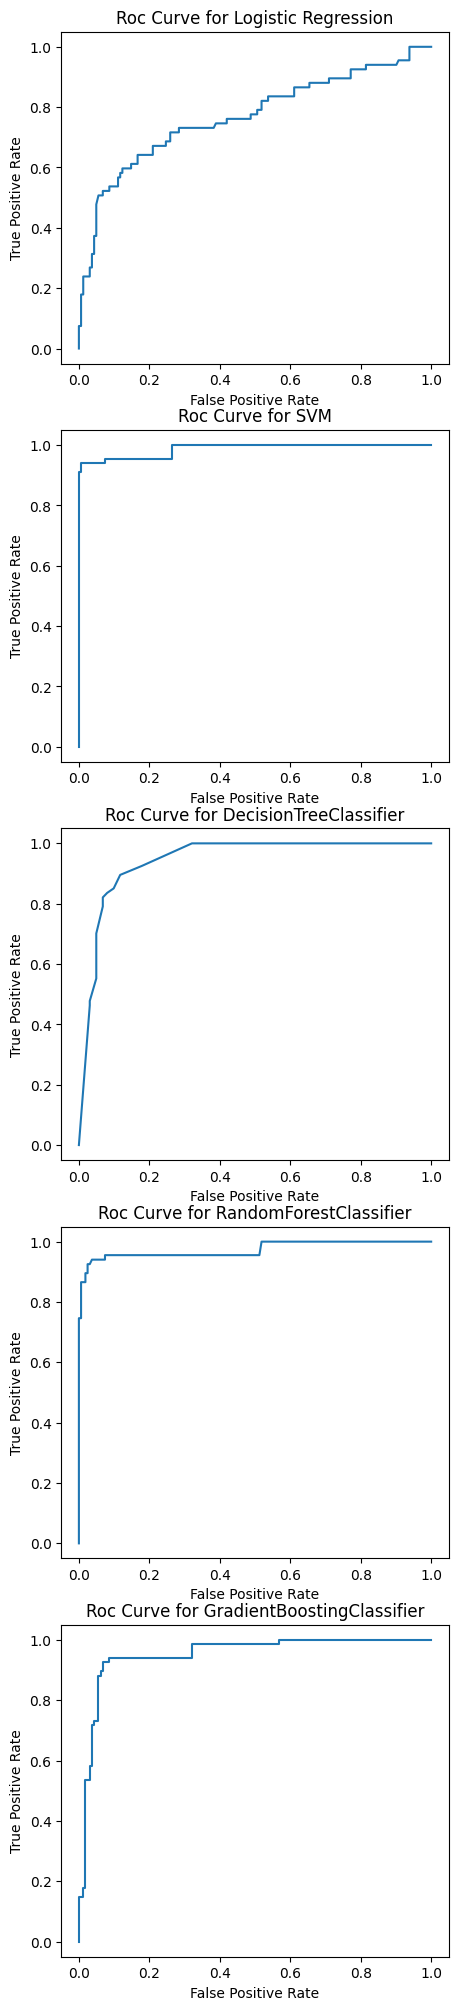

In [53]:
fig,axs=plt.subplots(nrows=len(models.keys()),figsize=(5,5*len(models.keys())))
metrics_bunder={list(models.keys())[i]:models[list(models.keys())[i]].metrics(plot_roc=True,ax=axs[i]) for i in range(len(models.keys()))}
metrics_bunder

In [54]:
{key:model.model.hyperparameters for key,model in zip(models.keys(),models.values())}

{'Logistic Regression': {'C': 0.09999999999999999,
  'max_iter': 100,
  'multi_class': 'auto',
  'n_jobs': None,
  'penalty': 'l1',
  'solver': 'liblinear'},
 'SVM': {'C': 10, 'degree': 3, 'gamma': 1, 'kernel': 'rbf'},
 'DecisionTreeClassifier': {'ccp_alpha': 0.0,
  'class_weight': None,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': None,
  'max_leaf_nodes': 97,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'random_state': None,
  'splitter': 'best'},
 'RandomForestClassifier': {'max_depth': 19, 'n_estimators': 243},
 'GradientBoostingClassifier': {'learning_rate': 0.1, 'n_estimators': 500}}

Same conclusion that for oversampling, but a difference with undersampling models underfit more than for dataset with oversampling. That's logical
because the training set is small, so the model have less informations and consequently bias increase for the model and variance can decrease.
Best model with undersampling: SVM with tuning of hyperparameters.
Rq: final hyperparameters for SVM for oversampling dataset and undersampling dataset are the same, this model are specifically created for this dataset !

In [26]:
hyperparams_opti={
    'SVM':
    {
        'C': 10, 'degree': 3, 'gamma': 1, 'kernel': 'rbf'
    },
    'DecisionTreeClassifier':
        {
            'ccp_alpha': 0.0,
            'class_weight': None,
            'criterion': 'gini',
            'max_depth': None,
            'max_features': None,
            'max_leaf_nodes': None,
            'min_impurity_decrease': 0.0,
            'min_samples_leaf': 1,
            'min_samples_split': 2,
            'min_weight_fraction_leaf': 0.0,
            'random_state': None,
            'splitter': 'best'
        },
    'RandomForestClassifier':
        {
            'max_depth': 19,
            'n_estimators': 301
        },
    'GradientBoostingClassifier':
        {
            'learning_rate': 0.1,
            'n_estimators': 1250
        }

}
#To conclude we choose the model with few parameters, SVM are good and have few parameters but we choose RandomForestClassifier because SVM take a long time
#for training and we are going to evaluate bias and variance of the final model

In [31]:
from src.core.ComputeModel import ComputeModel
best_models={
    "RandomForestClassifier":
        ComputeModel(df_new_[relevant_features],df_new_[outcome], \
                     process=process,model_name="RandomForestClassifier", \
                     positive_mod=positive_mod,grid_search=False,params_grid=hyperparams_opti["RandomForestClassifier"],stratify=False)
}

{'auc': 0.9998521147589471,
 'accuracy': 0.9978308026030369,
 'precision': 1.0,
 'recall': 0.9855072463768116,
 'f1_score': 0.9927007299270074}

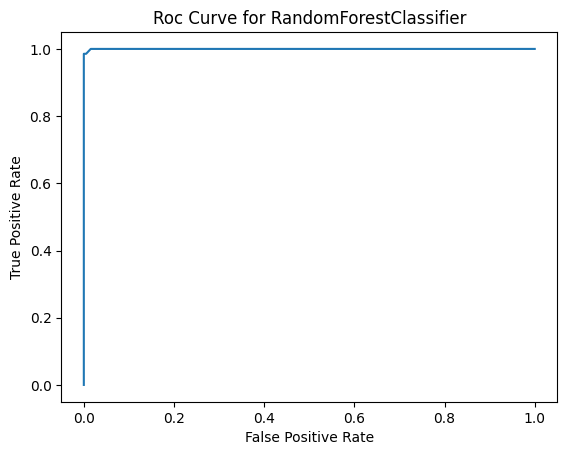

In [37]:
fig,ax=plt.subplots()
best_models["RandomForestClassifier"].metrics(plot_roc=True,ax=ax)

In [54]:
bias_two,variance=best_models["RandomForestClassifier"].bias_variance_estimate(bootstrap_rounds=1001)

/home/khaldi/Documents/unbalanced-data-ml/src/core/ComputeModel.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  preds_test[f'Model {r}'] = estimator.fit(np.array(X_train.iloc[boot, :]), np.array(y_train.iloc[boot]).ravel()).predict(X_test)
/home/khaldi/Documents/unbalanced-data-ml/src/core/ComputeModel.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  preds_test[f'Model {r}'] = estimator.fit(np.array(X_train.iloc[boot, :]), np.array(y_train.iloc[boot]).ravel()).predict(X_test)
/home/khaldi/Documents/unbalanced-data-ml/

In [55]:
print(f"Finally: Bias²: {bias_two} and Variance: {variance}")

Finally: Bias²: 0.0 and Variance: 0.01226988234862251
